Se recomienda que este código se ejecute con un Kernel de una GPU.

In [ ]:
import pandas as pd
from gensim.utils import simple_preprocess
from gensim import corpora
import matplotlib.pyplot as plt

In [ ]:
url_recipes = "https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/recipes.csv"
url_stu = "https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/text-analysis/data/state-of-the-union.csv"


df = pd.read_csv(url_stu)

# Clean it up a little bit, removing non-word characters (numbers and ___ etc)
df.content = df.content.str.replace("[^A-Za-z ]", " ")

df.head()

<ipython-input-2-735919db37c4>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df.content = df.content.str.replace("[^A-Za-z ]", " ")


,year,content
0,1790,George Washington January Fellow Citi...
1,1790,State of the Union Address George Washington ...
2,1791,State of the Union Address George Washington ...
3,1792,State of the Union Address George Washington ...
4,1793,State of the Union Address George Washington ...


In [ ]:

df.content.iloc[0]

'George Washington January          Fellow Citizens of the Senate and House of Representatives   I embrace with great satisfaction the opportunity which now presents itself of congratulating you on the present favorable prospects of our public affairs  The recent accession of the important state of North Carolina to the Constitution of the United States  of which official information has been received   the rising credit and respectability of our country  the general and increasing good will toward the government of the Union  and the concord  peace  and plenty with which we are blessed are circumstances auspicious in an eminent degree to our national prosperity   In resuming your consultations for the general good you can not but derive encouragement from the reflection that the measures of the last session have been as satisfactory to your constituents as the novelty and difficulty of the work allowed you to hope  Still further to realize their expectations and to secure the blessing

In [ ]:

df.shape

(226, 2)

# Topic modeling con Gensim

In [ ]:
simple_preprocess?

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

texts = df.content.apply(simple_preprocess)

In [ ]:

texts

0      [george, washington, january, fellow, citizens...
1      [state, of, the, union, address, george, washi...
2      [state, of, the, union, address, george, washi...
3      [state, of, the, union, address, george, washi...
4      [state, of, the, union, address, george, washi...
                             ...                        
221    [state, of, the, union, address, george, bush,...
222    [address, to, joint, session, of, congress, ba...
223    [state, of, the, union, address, barack, obama...
224    [state, of, the, union, address, barack, obama...
225    [state, of, the, union, address, barack, obama...
Name: content, Length: 226, dtype: object

In [ ]:
dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5)

corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:

corpus[:3]

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 2),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 2),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1)

In [ ]:
from gensim import models

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [ ]:
n_topics = 15

# Build an LSI model
lsi_model = models.LsiModel(corpus_tfidf,
                            id2word=dictionary,
                            num_topics=n_topics)

In [ ]:
lsi_model.print_topics()

[(0,
  '-0.084*"tonight" + -0.073*"program" + -0.066*"ve" + -0.065*"help" + -0.065*"budget" + -0.065*"mexico" + -0.065*"americans" + -0.061*"programs" + -0.059*"jobs" + -0.058*"re"'),
 (1,
  '-0.206*"tonight" + -0.169*"ve" + -0.137*"re" + -0.136*"jobs" + -0.130*"americans" + -0.124*"budget" + -0.123*"help" + -0.116*"programs" + -0.112*"program" + -0.106*"billion"'),
 (2,
  '0.199*"tonight" + 0.176*"ve" + 0.164*"re" + -0.137*"program" + 0.094*"jobs" + 0.092*"ll" + -0.092*"farm" + 0.091*"iraq" + -0.087*"veterans" + -0.081*"industrial"'),
 (3,
  '-0.141*"program" + 0.120*"silver" + 0.113*"re" + 0.110*"cent" + 0.105*"ve" + -0.105*"communist" + 0.099*"tonight" + -0.098*"soviet" + -0.095*"programs" + 0.089*"gold"'),
 (4,
  '0.199*"iraq" + 0.172*"terrorists" + -0.141*"silver" + -0.132*"gold" + 0.125*"interstate" + 0.119*"iraqi" + 0.111*"al" + -0.109*"programs" + -0.100*"soviet" + -0.100*"notes"'),
 (5,
  '-0.273*"iraq" + -0.236*"terrorists" + 0.185*"ve" + 0.185*"re" + -0.168*"iraqi" + -0.152*

In [ ]:
n_words = 10

topic_words = pd.DataFrame({})

for i, topic in enumerate(lsi_model.get_topics()):
    top_feature_ids = topic.argsort()[-n_words:][::-1]
    feature_values = topic[top_feature_ids]
    words = [dictionary[id] for id in top_feature_ids]
    topic_df = pd.DataFrame({'value': feature_values, 'word': words, 'topic': i})
    topic_words = pd.concat([topic_words, topic_df], ignore_index=True)

topic_words.head()

,value,word,topic
0,-0.001419,tropics,0
1,-0.001452,correspondingly,0
2,-0.001460,combatant,0
3,-0.001461,smallpox,0
4,-0.001520,inordinate,0


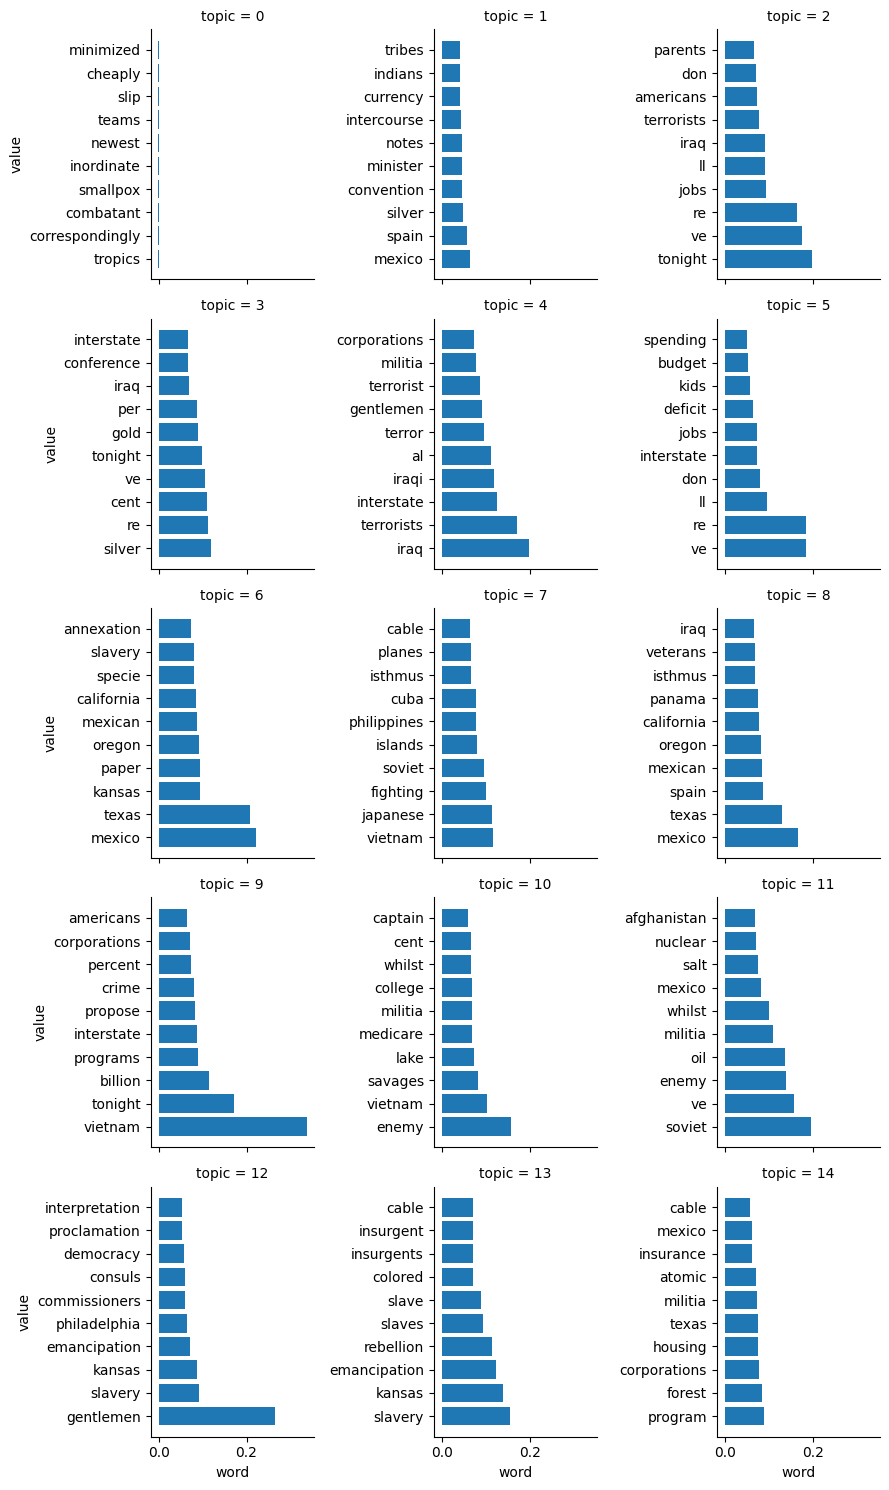

In [ ]:
import seaborn as sns

g = sns.FacetGrid(topic_words, col="topic", col_wrap=3, sharey=False)
g.map(plt.barh, "word", "value")

# Topic modeling con LDA 

In [ ]:
from gensim.utils import simple_preprocess

texts = df.content.apply(simple_preprocess)

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
from gensim import models

n_topics = 10

lda_model = models.LdaModel(corpus=corpus, num_topics=n_topics)

In [ ]:
lda_model.print_topics()

[(0,
  '0.004*"1559" + 0.003*"1930" + 0.003*"1626" + 0.003*"440" + 0.002*"151" + 0.002*"1260" + 0.002*"1971" + 0.002*"57" + 0.002*"1536" + 0.002*"1999"'),
 (1,
  '0.004*"1930" + 0.004*"1986" + 0.003*"1559" + 0.003*"1260" + 0.003*"1971" + 0.003*"1974" + 0.002*"1999" + 0.002*"1995" + 0.002*"1964" + 0.002*"1242"'),
 (2,
  '0.005*"1986" + 0.003*"1559" + 0.003*"1922" + 0.002*"1242" + 0.002*"1930" + 0.002*"1278" + 0.002*"1545" + 0.002*"578" + 0.002*"151" + 0.002*"1327"'),
 (3,
  '0.004*"1559" + 0.003*"1986" + 0.003*"1930" + 0.002*"1865" + 0.002*"1260" + 0.002*"1626" + 0.002*"440" + 0.002*"1971" + 0.002*"151" + 0.002*"1259"'),
 (4,
  '0.004*"1260" + 0.003*"1559" + 0.003*"1930" + 0.003*"1986" + 0.003*"1971" + 0.003*"1999" + 0.002*"1989" + 0.002*"1242" + 0.002*"1784" + 0.002*"976"'),
 (5,
  '0.005*"1930" + 0.004*"1242" + 0.003*"1260" + 0.003*"1964" + 0.003*"1986" + 0.003*"1974" + 0.003*"1999" + 0.003*"1989" + 0.003*"1971" + 0.003*"1559"'),
 (6,
  '0.003*"1626" + 0.003*"1559" + 0.003*"1446" + 0.

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 31.9 MB/s eta 0:00:00


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)
lda_viz

/usr/local/lib/python3.9/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.011381 -0.001044       1        1  28.847387
5     -0.010166 -0.000821       2        1  24.561002
0      0.006193  0.002284       3        1  13.877987
8      0.004935  0.001663       4        1  10.908889
3      0.002059 -0.000996       5        1   6.079716
9     -0.004046 -0.001398       6        1   4.880857
1     -0.005526  0.002942       7        1   3.789884
2     -0.000288 -0.005322       8        1   2.675958
4     -0.002954  0.002502       9        1   2.579790
7     -0.001588  0.000190      10        1   1.798530, topic_info=            Term        Freq       Total Category  logprob  loglift
1986     program  643.000000  643.000000  Default  30.0000  30.0000
1930        help  724.000000  724.000000  Default  29.0000  29.0000
1260   americans  692.000000  692.000000  Default  28.0000  28.0000
1559      mexico  806.000000  806.000000  Default  27.0000  27.0000
1971      budget  496.000000  496.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
151   convention    8.055884  550.668083  Topic10  -6.3684  -0.2065
266         bank    7.252017  418.621715  Topic10  -6.4735  -0.0375
1784        gold    6.892539  422.559072  Topic10  -6.5243  -0.0977
440        court    7.009322  526.394455  Topic10  -6.5075  -0.3006
81          post    6.697372  385.655205  Topic10  -6.5531  -0.0350

[709 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
658       1  0.420058  absolute
658       2  0.215414  absolute
658       3  0.107707  absolute
658       4  0.075395  absolute
658       5  0.043083  absolute
...     ...       ...       ...
1796      6  0.052252     young
1796      7  0.057477     young
1796      8  0.020901     young
1796      9  0.036576     young
1796     10  0.015676     young

[3940 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 1, 9, 4, 10, 2, 3, 5, 8])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Crear el count vectorizer
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
 max_features=1000,
 stop_words='english')
corpus_sc=df.content

tf = tf_vectorizer.fit_transform(corpus_sc)

# Generar modelo de LDA
lda = LatentDirichletAllocation(n_components=10, max_iter=5, learning_method='online', learning_offset=50., random_state=0)

lda.fit(tf)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=5, random_state=0)

In [ ]:
lda_components=lda.components_


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:

# Print the topics with their terms
terms = tf_vectorizer.get_feature_names()
n_words = 10

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:n_words]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: ignored

# Topic modeling LSA

In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LsiModel

lsi = LsiModel(corpus_tfidf, id2word=dictionary, num_topics=5)


In [ ]:
lsi

In [ ]:
lsi.print_topics()


In [ ]:
corpus_sc=df.content

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
tv = TfidfVectorizer()
svd = TruncatedSVD(n_components=100)
lsa = make_pipeline(tv, svd, Normalizer(copy=False))
lsa_topic_vectors = lsa.fit_transform(corpus_sc)


In [ ]:
lsa_topic_vectors